In [1]:
from functools import reduce
import operator
import networkx as nx
from networkx.algorithms import bipartite
from IPython.display import display
import matplotlib.pyplot as plt

import sympy
import scipy
import numpy as np
pi = sympy.pi
n, x, y, z = sympy.symbols('n x y z')
sympy.init_printing(use_unicode=True)

In [2]:
################## Num1 ##################
f = abs(sympy.sin(x))

a_0 = 1/(2*pi) * sympy.integrate(f, (x, -pi, pi))
a_n = 1/pi * sympy.integrate(f * sympy.cos(n * x), (x, -pi, pi))
b_n = 1/pi * sympy.integrate(f * sympy.sin(n * x), (x, -pi, pi))
display(a_0)
display(a_n)
display(b_n)
print(sympy.latex(a_n))

⎧          0            for n = -1 ∨ n = 1
⎪                                         
⎪  2⋅cos(π⋅n)     2                       
⎨- ────────── - ──────      otherwise     
⎪     2          2                        
⎪    n  - 1     n  - 1                    
⎩                                         
──────────────────────────────────────────
                    π                     

\frac{\begin{cases} 0 & \text{for}\: n = -1 \vee n = 1 \\- \frac{2 \cos{\left(\pi n \right)}}{n^{2} - 1} - \frac{2}{n^{2} - 1} & \text{otherwise} \end{cases}}{\pi}


- \frac{4 \cos{\left(2 x \right)}}{3 \pi} - \frac{4 \cos{\left(4 x \right)}}{15 \pi} - \frac{4 \cos{\left(6 x \right)}}{35 \pi} + \frac{2}{\pi}


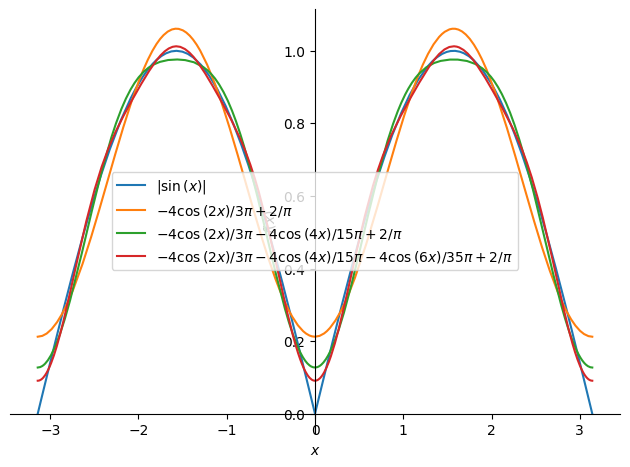

In [16]:
################## Num1 ##################
f = abs(sympy.sin(x))
s = sympy.fourier_series(f, (x, -pi, pi))
s1 = s.truncate(n=2)
s2 = s.truncate(n=3)
s3 = s.truncate(n=4)
p = sympy.plot(f, s1, s2, s3, (x, -pi, pi), show=False, legend=True)
p.save('num1.png')
print(sympy.latex(s3))
p.show()

    ⎛⎧  4⋅cos(π⋅n)   4⋅sin(π⋅n)                            ⎞
    ⎜⎪- ────────── + ──────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0⎟
    ⎜⎪     2  2         3  3                               ⎟
1.0⋅⎜⎨    π ⋅n         π ⋅n                                ⎟
    ⎜⎪                                                     ⎟
    ⎜⎪           4/3                     otherwise         ⎟
    ⎝⎩                                                     ⎠

\frac{4.0 \cos{\left(\frac{\pi x}{2} \right)}}{\pi^{2}} - \frac{1.0 \cos{\left(\pi x \right)}}{\pi^{2}} + \frac{0.444444444444444 \cos{\left(\frac{3 \pi x}{2} \right)}}{\pi^{2}} - \frac{0.25 \cos{\left(2 \pi x \right)}}{\pi^{2}} + \frac{0.16 \cos{\left(\frac{5 \pi x}{2} \right)}}{\pi^{2}} + 0.666666666666667


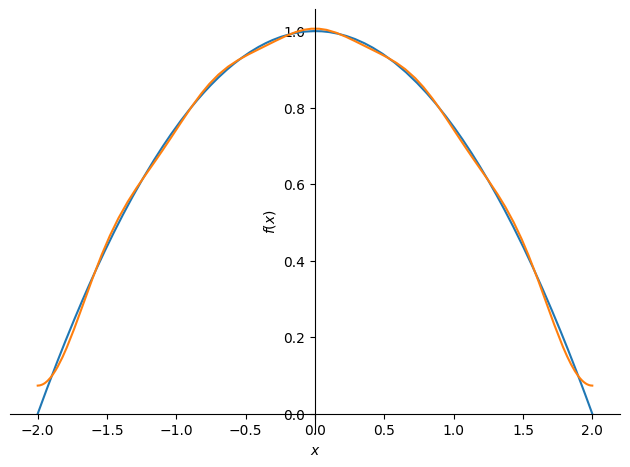

In [81]:
################## Num2 ##################

f = 1-x**2/4

L = 2
a_0 = 1/L * sympy.integrate(f, (x, 0, L))
a_n = 2/L * sympy.integrate(f * sympy.cos(n * pi * x / L), (x, 0, L))
b_n = 2/L * sympy.integrate(f * sympy.sin(n * pi * x / L), (x, 0, L))
display(a_0)
# display(a_n)
# display(b_n)
aout = a_0
for i in range(1, 6):
    aout += a_n.subs({n: i})*sympy.cos(i*pi*x/L)
display(a_n)
print(sympy.latex(aout))
p2 = sympy.plot(f, aout, (x, -L, L), show=True)
# p2.save('num3a.png')

1 1 sin(x)
2 0 sin(2*x)
3 0 sin(3*x)
4 0 sin(4*x)
5 0 sin(5*x)


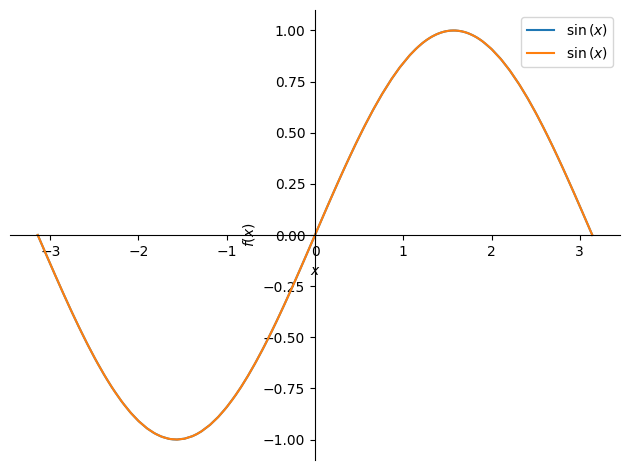

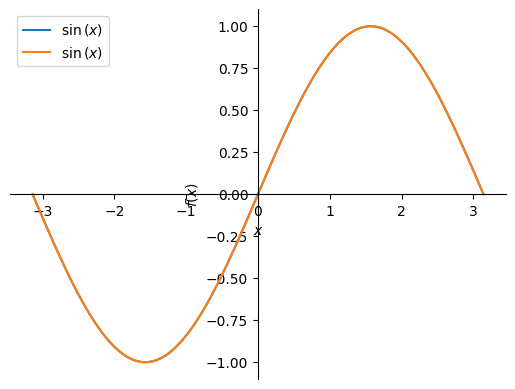

In [104]:
################## Num3 ##################
f = sympy.sin(x)

L = pi
a_0 = 1/L * sympy.integrate(f, (x, 0, L))
a_n = 2/L * sympy.integrate(f * sympy.cos(n * pi * x / L), (x, 0, L))
b_n = 2/L * sympy.integrate(f * sympy.sin(n * pi * x / L), (x, 0, L))
# print("a_0", a_0)
# display(a_n)
# display(b_n)
# aout = a_0
# for i in range(1, 6):
#     aout += a_n.subs({n: i})*sympy.cos(i*pi*x/L)
# display(aout)
# display(a_n)
# print(sympy.latex(aout))
# p2 = sympy.plot(f, aout, (x, -L, L), show=True)
# # p2.save('num3a.png')

bout = 0
for i in range(1, 6):
    print(i, b_n.subs({n: i}), sympy.sin(i*pi*x/L))
    bout += b_n.subs({n: i})*sympy.sin(i*pi*x/L)

# print(sympy.latex(bout))
p3 = sympy.plot(f, bout, (x, -L, L), show=True, legend=True)
p3.save('num3b.png')

In [105]:
################## Num4 ##################

def fourier_estar(f, t):
    a_0 = 1/(2*pi) * sympy.integrate(f, (x, -pi, pi))
    a_n = lambda n: 1/pi * sympy.integrate(f * sympy.cos(n * x), (x, -pi, pi))
    b_n = lambda n: 1/pi * sympy.integrate(f * sympy.sin(n * x), (x, -pi, pi))
    a_sum = lambda n: reduce(operator.add, map(lambda v: a_n(v)**2, range(1, n+1)), 0)
    b_sum = lambda n: reduce(operator.add, map(lambda v: b_n(v)**2, range(1, n+1)), 0)
    int_sq = sympy.integrate(f**2, (x, -np.pi, np.pi))
    return int_sq - pi*(2*a_0**2 + a_sum(t) + b_sum(t))

f = abs(sympy.sin(x))
 
display(a_0)
a_n = lambda n: 1/pi * sympy.integrate(f * sympy.cos(n * x), (x, -pi, pi))
for i in range(2, 8, 2):
    display(a_n(i))

# print('    N E*')
# for t in range(1, 11):
#     print(f'|{t:5}|{sympy.N(fourier_estar(f, t)):.4f}|')